<p align="center">
<FONT FACE="times new roman" SIZE=5>
<br>
<img src="https://www.usergioarboleda.edu.co/wp-content/uploads/ultimatum/imagens/logo-mobile-UniversidadSergioArboleda.png"
width="750" height="250">
</img>
<br>
<i><b>Docente:</b> Juan Pablo Ospina.</i>
<br>
<i><b>Asignatura:</b> Vida artificial</i>
<br>
<i><b>Estudiantes:</b> Chiara Valenzuela, Andrea Terraza y Miguel Thomas</i>
<br>
<i><b>Tema:</b> Procesos aleatorios y componentes de una serie</i>
<br>
<i><b>Grupo:</b> Dracarys (A)</i>
<br>
<img src='https://i.pinimg.com/originals/ba/78/85/ba788588817b74ef4713383ceac3e0ef.gif'>
<br>
<i>10/09/24</i>
</FONT>
</p>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics import tsaplots
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
plt.style.use('ggplot')

### 1.Genere una muestra aleatoria de tama√±o 1000 a partir de una distribuci√≥n normal est√°ndar. Visualice los datos como una serie de tiempo. ¬øVerifique si se observa tendencia, comportamiento c√≠clico o estacional? Interprete los resultados.

In [2]:
np.random.seed(0)
data = np.random.randn(1000)

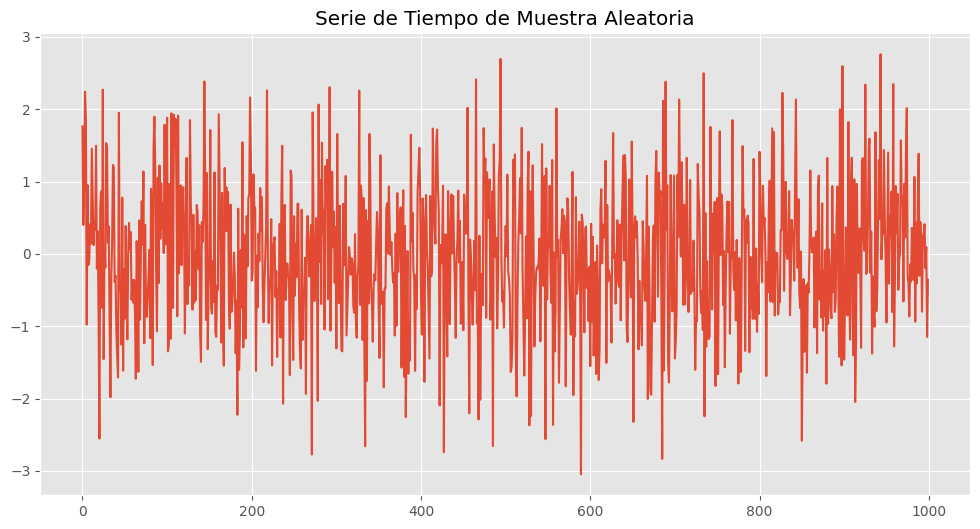

In [3]:
plt.figure(figsize=(12, 6))
plt.plot(data)
plt.title('Serie de Tiempo de Muestra Aleatoria')
plt.grid(True)
plt.show()

1. **Tendencia:** En la muestra aleatoria generada a partir de una distribuci√≥n normal est√°ndar, no se observa una tendencia clara en los datos, ya que est√°n distribuidos aleatoriamente alrededor de la media (0 en este caso).

2. **Comportamiento C√≠clico:** La distribuci√≥n normal no presenta un comportamiento c√≠clico por s√≠ misma.

3. **Estacionalidad:** Similar al comportamiento c√≠clico, la distribuci√≥n normal est√°ndar no tiene componentes estacionales.

La serie de tiempo parece ser ruido blanco, donde cada observaci√≥n es independiente y sigue la misma distribuci√≥n. Esto es consistente con una muestra aleatoria de una distribuci√≥n normal est√°ndar, donde no se esperan tendencias, ciclos ni estacionalidades.

### 2.Obtenga los valores de autocorrelaci√≥n para los primeros 100 retrasos del punto anterior y visualice el diagrama de autocorrelaci√≥n. Interprete los resultados.


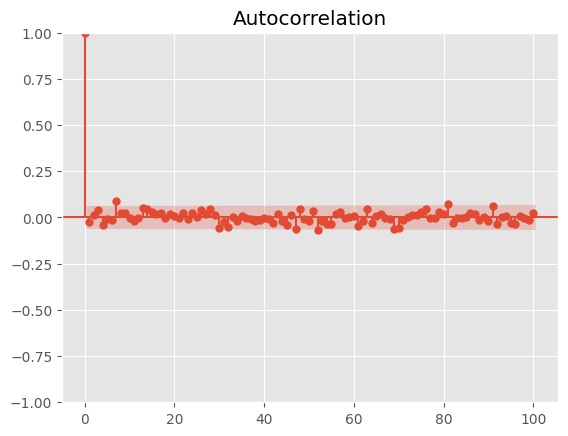

In [4]:
fig = tsaplots.plot_acf(data, lags = 100)
plt.show ()

**Valores de Autocorrelaci√≥n para los Primeros 100 Retrasos**
1. **Retraso 0**: La autocorrelaci√≥n en el retraso 0 es siempre 1, lo que indica una correlaci√≥n perfecta con uno mismo.
  
2. **Retrasos 1 a 100**:
   - Para los retrasos de 1 a 100, las autocorrelaciones son cercanas a 0, lo que indica que no hay una correlaci√≥n significativa entre los valores de la serie temporal separados por esos retrasos.
   - No se observa ning√∫n patr√≥n claro o tendencia en la autocorrelaci√≥n para estos retrasos, lo que sugiere que la serie temporal podr√≠a ser ruido blanco o carecer de estructura temporal evidente.

**Interpretaci√≥n**
- **Ruido Blanco**: La gr√°fica sugiere que la serie temporal es ruido blanco, ya que la mayor√≠a de los valores de autocorrelaci√≥n (para retrasos mayores que 0) son cercanos a 0. Esto significa que los valores en la serie no est√°n correlacionados entre s√≠ a trav√©s del tiempo, lo cual es t√≠pico en un proceso de ruido blanco.
  
- **No Estacionalidad**: La falta de picos significativos a retrasos espec√≠ficos indica que no hay estacionalidad evidente en la serie temporal.

### 3.Explique desde el punto de vista estad√≠stico en que consiste el ruido blanco (en particular el ruido blanco Gausiano). Defina con sus palabras que podemos considerar un proceso aleatorio en el contexto de las series de tiempo.

El ruido es una secuencia de variables aleatorias que cambian con el tiempo. El ruido blanco gaussiano es un caso particular de ruido blanco donde las muestras no solo son independientes entre s√≠, sino que tambi√©n siguen un distribuci√≥n normal.

Cada valor del proceso es independiente de los dem√°s. Es decir, conocer un valor de la serie no proporciona informaci√≥n sobre los valores en los otros puntos. Esto se traduce en una funci√≥n de autocorrelaci√≥n que es 0 para todos los retrasos distintos de cero.

Las muestras del ruido gaussiano se distribuyen seg√∫n la curva de distribuci√≥n normal. Esto significa que la mayor√≠a de valores se encuentran cerca de la media, que se cero en la mayor√≠a de los casos, y la probabilidad de obtener valores extremos disminuye r√°pidamente a medida que se alejan de la media. En t√©rminos estad√≠sticos, si ùëã‚Çú es una muestra del ruido blanco gaussiano, entonces ùëã‚Çú ~ ùëÅ(ùúá,œÉ^2), donde ùúá es la media y œÉ^2 es la varianza.

Referencias: [Fern√°ndez R. V.](http://rstudio-pubs-static.s3.amazonaws.com/394452_eaa513348793474b9d21505e2429bb05.html), [Introducci√≥n](https://www.uco.es/users/ma1fegan/2015-2016/vision/Temas/ruido.pdf)

---

Un proceso aleatorio en el contexto de las series de tiempo se refiere a una secuencia de observaciones que se generan de manera impredecible. Cada punto de la serie representa un valor que no puede ser antecipado con precisi√≥n, aunque pueda seguir ciertos patrones o tendencias generales. En algunos casos, las observaciones pueden estar relacionadas entre s√≠, es decir, el valor de un momento dado puede depender del anterior a pesar de que son aleatorias.

### 4.Cargue en un dataframe el archivo aus_livestock.csv disponible en este repositorio. Filtre los valores relacionados a la cantidad de cerdos sacrificados en el estado de Victoria para las fechas posteriores al 2014. Divida cada valor de la serie por mil para cambiar la escala a miles y visualice los datos como una serie de tiempo.

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/jpospinalo/time-series/main/aus_livestock.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df['Month'] = pd.to_datetime(df['Month'], format = '%Y %b')
df.set_index('Month', inplace=True)

In [6]:
df.head()

Animal                         State   Count
Month                                                                       
1976-07-01  Bulls, bullocks and steers  Australian Capital Territory  2300.0
1976-08-01  Bulls, bullocks and steers  Australian Capital Territory  2100.0
1976-09-01  Bulls, bullocks and steers  Australian Capital Territory  2100.0
1976-10-01  Bulls, bullocks and steers  Australian Capital Territory  1900.0
1976-11-01  Bulls, bullocks and steers  Australian Capital Territory  2100.0

In [7]:
df_filtered = df[(df['Animal'] == 'Pigs') & (df['State'] == 'Victoria') & (df.index > '2014')]
df_filtered['Count'] = df_filtered['Count'] / 1000

<ipython-input-7-91cfaf5febbf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Count'] = df_filtered['Count'] / 1000


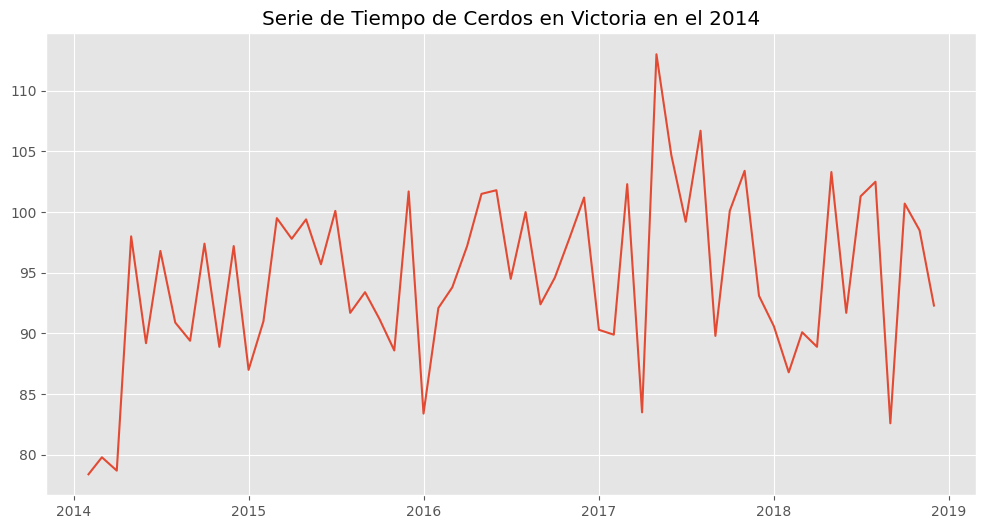

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(df_filtered['Count'])
plt.title('Serie de Tiempo de Cerdos en Victoria en el 2014')
plt.grid(True)
plt.show()

### 5.Obtenga los valores de autocorrelaci√≥n para los primeros 30 retrasos del punto anterior y visualice el diagrama de autocorrelaci√≥n. ¬øEs posible identificar tendencia y estacionalidad en el gr√°fico de autocorrelaci√≥n? Interprete los resultados.

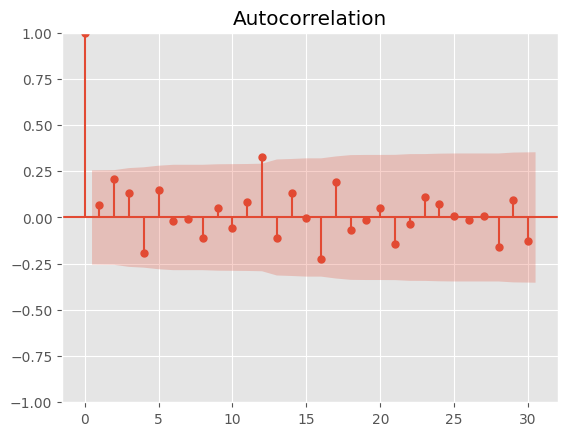

In [9]:
fig = tsaplots.plot_acf(df_filtered['Count'], lags = 30)
plt.show ()

1. **Tendencia**:
   La mayor√≠a de las autocorrelaciones, excepto el primer lag, est√°n cerca de cero y dentro de los l√≠mites de confianza (√°rea sombreada en rojo). Esto indica que no parece haber una tendencia clara en los datos, ya que la autocorrelaci√≥n no persiste significativamente en lags posteriores.

2. **Estacionalidad**:
   En este gr√°fico, no se observan patrones claros ni picos recurrentes en intervalos espec√≠ficos, lo que sugiere la ausencia de estacionalidad fuerte en los datos.

El gr√°fico de autocorrelaci√≥n sugiere que los datos no presentan ni tendencia significativa ni estacionalidad. La serie parece ser m√°s aleatoria.

### 6.Consulte la diferencia entre la funci√≥n de autocorrelaci√≥n y la funci√≥n de autocorrelaci√≥n parcial. Explique qu√© ventajas y desventajas tienen cada una.

**Funci√≥n de Autocorrelaci√≥n (ACF)**

La ACF calcula la correlaci√≥n entre los valores actuales de la serie y los valores pasados a diferentes intervalos de tiempo.

* **Ventajas de la ACF**

    * Permite visualizar la estructura de correlaci√≥n a lo largo de varios rezasgos, ayudando a identificar patrones estacionales o c√≠clicos.

    * Es relativamente simple de calcular y de interpretar, lo que la hace accesible para analistas no especialistas.
* **Desventajas de la ACF**

    * La ACF considera todos los retrasos simult√°neamente, lo que puede llevar a interpretaciones err√≥neas si hay interacciones complejas entre los retrasos.

**Funci√≥n de Autocorrelaci√≥n Parcial (PACF)**

La PACF, por otro lado, mide la correlaci√≥n entre una serie y sus retrasos, eliminando la influencia de los rezasgos intermedios.

* **Ventajas de la PACF**

    * La PACF permite identificar la relaci√≥n directa entre la serie y un rezasgo espec√≠fico, lo que es crucial para la identificaci√≥n de modelos autorregresivos.

* **Desventajas de la PACF**
    * El c√°lculo de la PACF puede ser m√°s complejo que el de la ACF, especialmente en t√©rminos de interpretaci√≥n, ya que requiere un entendimiento m√°s profundo de la estructura de los datos.
    * Al centrarse en las relaciones directas, puede perder informaci√≥n sobre patrones de correlaci√≥n m√°s complejos que pueden estar presentes en la ACF.

Las dos funciones son complementarias y se usan en conjunto para el an√°lisis de series temporales. La ACF es adecuada para una visi√≥n general de las dependencias en los datos, mientras que la PACF es crucial para la identificaci√≥n precisa de modelos autorregresivos.


Referencias:
[Modelos de Series Temporales](https://www.ucm.es/data/cont/media/www/pag-41459/Series%20temporales%20Econometria%20Novales.pdf),
[IBM](https://www.ibm.com/docs/es/spss-modeler/saas?topic=data-autocorrelation-partial-autocorrelation-functions),
[ResearchGate](https://www.researchgate.net/figure/Funciones-de-autocorrelacion-y-autocorrelacion-parcial-de-la-serie_fig4_283169729)


### 7.Cargue en un dataframe el archivo aus_retail.csv disponible en este repositorio. Filtre los valores para los valores de ‚ÄúFood Retailing‚Äù en la columna ‚ÄúIndustry‚Äù. Los datos presentan valores para varios estados en las mismas fechas. Sume los valores de la columna ‚ÄúTurnover‚Äù para todos los estados seg√∫n la fecha y visualice el resultado como una serie de tiempo. ¬øAnalice la tendencia, la estacionalidad y la variaci√≥n de la serie?

In [10]:
df2 = pd.read_csv('https://raw.githubusercontent.com/jpospinalo/time-series/main/aus_retail.csv')
df2.drop(columns=['Unnamed: 0'], inplace=True)
df2['Month'] = pd.to_datetime(df2['Month'], format = '%Y %b')
df2.set_index('Month', inplace=True)

In [11]:
df2_filtered = df2[df2['Industry'] == 'Food retailing']
df2_filtered = df2_filtered['Turnover'].groupby(df2_filtered.index).sum()

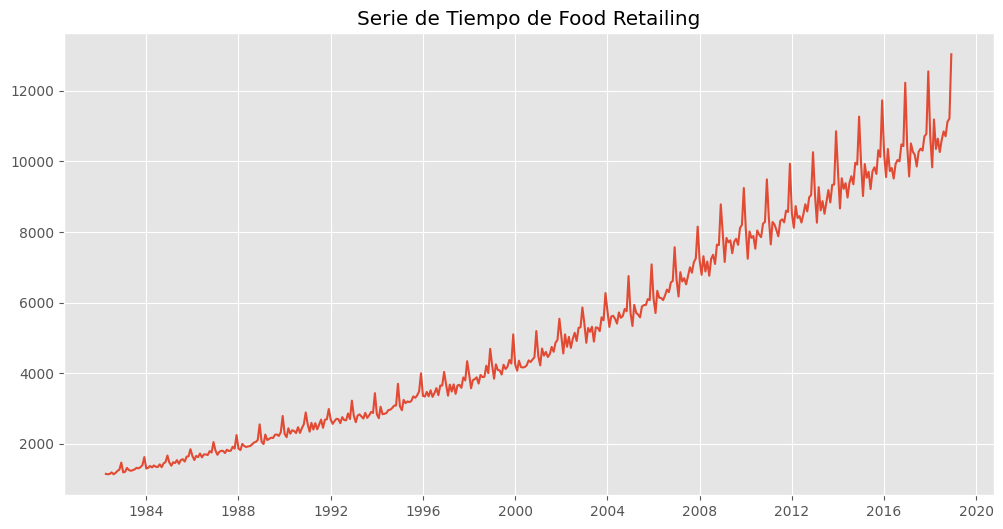

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(df2_filtered)
plt.title('Serie de Tiempo de Food Retailing')
plt.grid(True)
plt.show()

1. **Tendencia**: La serie muestra una clara tendencia creciente a lo largo del tiempo desde el inicio de la serie en los a√±os 1980 hasta aproximadamente 2020.El crecimiento no es lineal, sino que parece acelerarse en la √∫ltima d√©cada (especialmente despu√©s de 2010). Esto podr√≠a deberse a factores como un aumento en el consumo, expansi√≥n del mercado o inflaci√≥n.

    La tendencia ascendente puede estar impulsada por un crecimiento econ√≥mico general, un aumento en la poblaci√≥n, mayores ingresos disponibles o una mayor penetraci√≥n del mercado por parte del sector de "Food Retailing".

2. **Estacionalidad**: Se observan picos y valles regulares en la serie, lo que indica la presencia de estacionalidad. Estos patrones son consistentes a lo largo de los a√±os y sugieren fluctuaciones anuales en las ventas. La magnitud de la estacionalidad parece haber aumentado con el tiempo.
La estacionalidad sugiere que hay momentos del a√±o en que las ventas aumentan de manera predecible, posiblemente debido a eventos como las festividades de fin de a√±o, vacaciones, o promociones estacionales.

3. **Variaci√≥n**: La mayor variabilidad en los datos recientes podr√≠a indicar que los eventos temporales (como promociones, cambios en el comportamiento del consumidor, o pol√≠ticas econ√≥micas) est√°n teniendo un mayor impacto en el volumen de ventas.  Conforme avanza el tiempo, no solo crece la serie, sino tambi√©n la volatilidad. Esto se ve en la mayor dispersi√≥n y amplitud de los picos y valles en las √∫ltimas d√©cadas.

### 8.Realice dos transformaciones sobre la serie obtenida en el punto anterior. La primera aplicando la funci√≥n ra√≠z cuadrada y la segunda aplicando la funci√≥n logaritmo. ¬øQu√© cambios es posible observar en las series resultantes? ¬øQu√© ventajas tendr√≠a trabajar con los datos transformados?

In [13]:
df2_sqrt = np.sqrt(df2_filtered)
df2_log = np.log(df2_filtered)

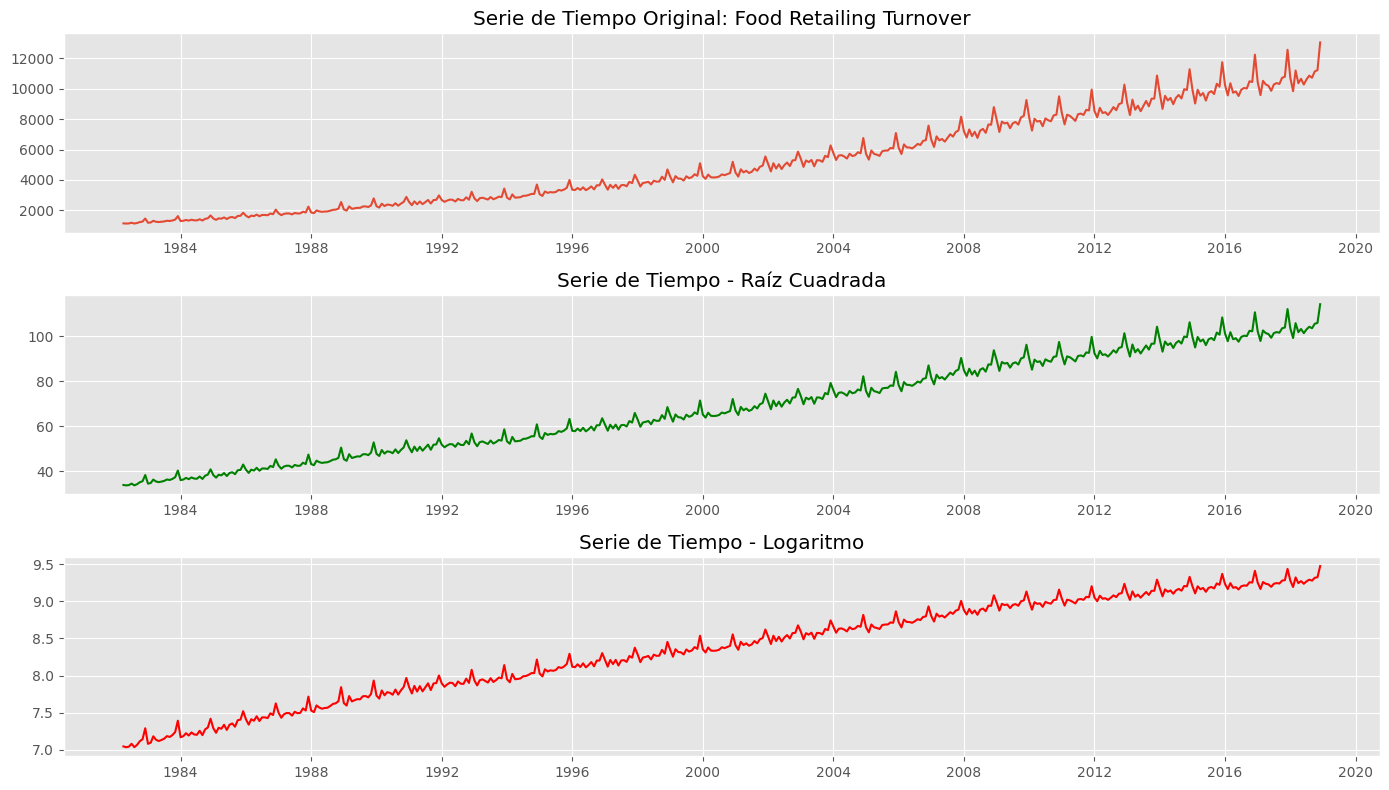

In [14]:
plt.figure(figsize=(14, 8))
plt.subplot(3, 1, 1)
plt.plot(df2_filtered.index, df2_filtered)
plt.title('Serie de Tiempo Original: Food Retailing Turnover')
plt.grid(True)

# Ra√≠z cuadrada
plt.subplot(3, 1, 2)
plt.plot(df2_sqrt.index, df2_sqrt, linestyle='-', color='g')
plt.title('Serie de Tiempo - Ra√≠z Cuadrada')
plt.grid(True)

# Logaritmo
plt.subplot(3, 1, 3)
plt.plot(df2_log.index, df2_log, linestyle='-', color='r')
plt.title('Serie de Tiempo - Logaritmo')
plt.grid(True)

plt.tight_layout()
plt.show()

**Cambios Observados en las Series Transformadas**

1. **Serie Transformada con Ra√≠z Cuadrada**:
   - La transformaci√≥n de ra√≠z cuadrada reduce la magnitud de los valores en la serie, especialmente aquellos valores altos. Esto se observa claramente en la gr√°fica donde los picos son menos pronunciados comparados con la serie original.
   - La serie transformada con ra√≠z cuadrada parece m√°s suave en comparaci√≥n con la serie original, pero todav√≠a mantiene cierta variabilidad y los patrones estacionales.
   - Los valores extremos (picos y valles) se suavizan, lo que ayuda a estabilizar la variabilidad.

2. **Serie Transformada con Logaritmo**:
   - La transformaci√≥n logar√≠tmica logra una suavizaci√≥n m√°s pronunciada en comparaci√≥n con la ra√≠z cuadrada. La serie resultante muestra menos variabilidad, especialmente en los picos altos, que son significativamente reducidos.
   - La serie logar√≠tmica parece mostrar una tendencia m√°s lineal en lugar de una curva exponencial.
   - Los patrones estacionales son menos marcados en la serie logar√≠tmica, lo que sugiere una atenuaci√≥n de las fluctuaciones estacionales.

---

**Ventajas de Trabajar con los Datos Transformados**

1. **Estabilizaci√≥n de la Varianza**: Las transformaciones (especialmente el logaritmo) son √∫tiles para estabilizar la varianza de la serie de tiempo. Esto es crucial cuando se trabaja con series en las que la variabilidad de la serie cambia con el tiempo.

2. **Mejora en el Modelado**: Los modelos lineales y otros modelos estad√≠sticos suelen funcionar mejor cuando la serie es m√°s estable y los picos est√°n atenuados. La transformaci√≥n logar√≠tmica en particular es com√∫nmente utilizada para linealizar relaciones exponenciales, facilitando el ajuste de modelos predictivos.

3. **Reducci√≥n de la Influencia de los Valores Extremos**: Las transformaciones reducen el impacto de los valores extremos (outliers), lo que puede mejorar la precisi√≥n de los modelos al evitar que estos valores desproporcionados dominen los resultados.

Las transformaciones de ra√≠z cuadrada y logaritmo permiten una mejor manejabilidad y an√°lisis de la serie de tiempo al reducir la variabilidad y estabilizar la serie, lo que facilita tanto la interpretaci√≥n como el modelado predictivo.

### 9.Cargue en un dataframe el archivo us_employment.csv disponible en este repositorio. Filtre los valores de la columna ‚ÄúEmployed‚Äù para fechas superiores a 1990 y asociados con valores ‚ÄúRetail Trade‚Äù de la columna ‚ÄúTitle‚Äù. Visualice los datos como una serie de tiempo.

In [15]:
df3 = pd.read_csv('https://raw.githubusercontent.com/jpospinalo/time-series/main/us_employment.csv')
df3.drop(columns=['Unnamed: 0'], inplace=True)
df3['Month'] = pd.to_datetime(df3['Month'], format = '%Y %b')
df3.set_index('Month', inplace=True)

In [16]:
df3_filtered = df3[(df3['Title'] == 'Retail Trade') & (df3.index > '1990')]

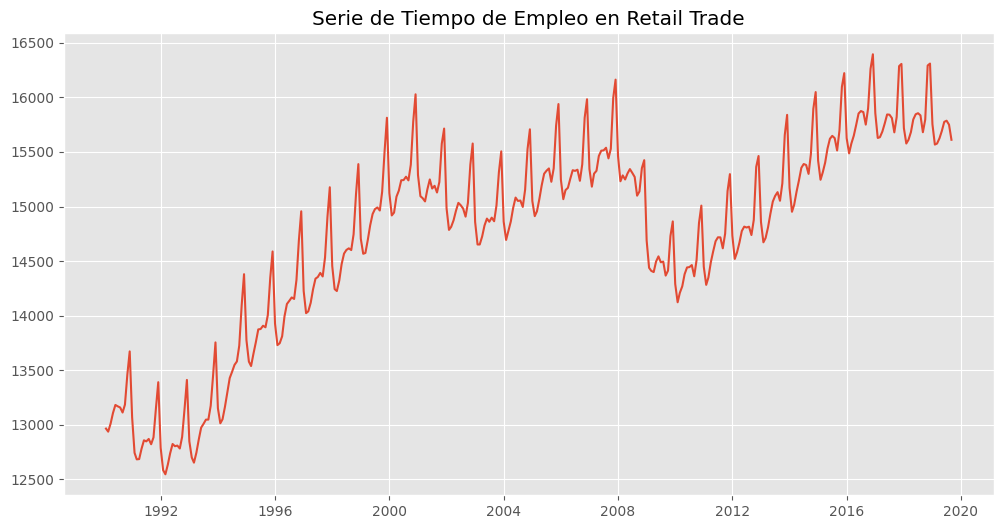

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(df3_filtered['Employed'])
plt.title('Serie de Tiempo de Empleo en Retail Trade')
plt.grid(True)
plt.show()

### 10.A partir de la gr√°fica generada en el punto anterior, identifique la tendencia, el comportamiento c√≠clico y el comportamiento estacional. Realice esta tarea √∫nicamente mediante inspecci√≥n visual.

1. **Tendencia**: La serie muestra una **tendencia ascendente** general desde 1990 hasta alrededor de 2010. Sin embargo, a partir de 2010, la tendencia parece estabilizarse, con el empleo manteni√©ndose en un rango m√°s estrecho, sin un aumento claro o significativo. La tendencia ascendente inicial indica un crecimiento sostenido en el empleo dentro del sector de comercio minorista durante este periodo.

2. **Comportamiento C√≠clico**: Se observan varios ciclos a lo largo de la serie, con periodos de aumento y disminuci√≥n que no est√°n claramente alineados con patrones estacionales. Estos ciclos pueden estar relacionados con factores econ√≥micos m√°s amplios, como recesiones o expansiones econ√≥micas.
   
    Por ejemplo, hay un ciclo notable de disminuci√≥n en el empleo alrededor de los a√±os 2008-2010, que coincide con la crisis financiera global.

3. **Comportamiento Estacional**: La serie muestra patrones estacionales claros y repetitivos. Estos patrones se manifiestan como picos y valles que ocurren de manera regular dentro de cada a√±o o en periodos espec√≠ficos.
    
     Estos picos estacionales son m√°s prominentes en ciertos periodos, especialmente hacia finales de a√±o, lo que podr√≠a estar asociado con el aumento del empleo temporal para atender la demanda en festividades y temporadas de compras como Navidad.

### 11.Consulte en que consiste la descomposici√≥n de una serie de tiempo. Explique en qu√© casos se puede utilizar la descomposici√≥n aditiva y cuando la multiplicativa. Presente un ejemplo de cada una. ¬øExplique qu√© representan los residuos en la descomposici√≥n? ¬øCu√°l ser√≠a el comportamiento esperado?

La descomposici√≥n de una serie de tiempo es un m√©todo que permite separar una serie de datos temporales en sus componentes fundamentales: tendencia, estacionalidad, c√≠clico y ruido o irregularidad. Esta t√©cnica facilita el an√°lisis de patrones y la predicci√≥n futura al identificar y modelar cada uno de estos componentes.

**Tipos de Descomposici√≥n**

- **Descomposici√≥n Aditiva**

    En la descomposici√≥n aditiva, se asume que la serie de tiempo se puede expresar como la suma de sus componentes:

$$
Y_t = T_t + S_t + E_t
$$
-  
    donde $Y_t$ es el valor observado en el tiempo $t$, $T_t$ es la tendencia, $S_t$ es la estacionalidad, y $E_t$ es el error o residuo.
    
    Se utiliza cuando la estacionalidad y el ruido no var√≠an significativamente en magnitud a lo largo del tiempo. Esto ocurre cuando los ciclos estacionales y las fluctuaciones son relativamente constantes a lo largo de los niveles de la tendencia.

    **Ejemplo de modelo aditivo:**
    Supongamos que estamos analizando el n√∫mero de clientes en una tienda minorista que tiene una ligera tendencia creciente con un patr√≥n estacional constante a lo largo del tiempo.

    La tienda recibe un promedio de 100 clientes al d√≠a durante la semana, con una estacionalidad de +20 clientes los s√°bados y -10 los lunes. Si hay una tendencia creciente de 5 clientes al mes, el n√∫mero total de clientes puede representarse como la suma de la tendencia, la estacionalidad y el ruido.

    - Tendencia ($T_t$): 100 clientes con un incremento mensual de 5 clientes.
    - Estacionalidad ($S_t$): +20 el s√°bado y -10 el lunes, independientemente del nivel.
    - Residuos ($E_t$): fluctuaciones aleatorias.

- **Descomposici√≥n Multiplicativa**

    En la descomposici√≥n multiplicativa, la serie se expresa como el producto de sus componentes:

$$
Y_t = T_t \times S_t \times E_t
$$
-  
    Se utiliza cuando las fluctuaciones estacionales y el ruido aumentan o disminuyen proporcionalmente con el nivel de la tendencia. Es decir, la estacionalidad no es constante, sino que aumenta a medida que el nivel general de la serie aumenta.

    **Ejemplo de modelo multiplicativo:**
    Supongamos que estamos analizando el ingreso mensual de una empresa de ventas de productos electr√≥nicos. En este caso, las ventas tienden a aumentar significativamente en √©pocas de vacaciones, como Navidad, pero el efecto estacional (el aumento en las ventas) es mayor cuando el negocio crece.

    Si la empresa tiene una tendencia de crecimiento mensual del 5%, las ventas durante Navidad podr√≠an multiplicarse por 1.5. As√≠, cuanto mayores sean las ventas en un mes promedio, m√°s grande ser√° el efecto estacional durante las vacaciones.

    - Tendencia ($T_t$): crecimiento mensual del 5%.
    - Estacionalidad ($S_t$): el aumento de ventas en Navidad multiplica las ventas por 1.5.
    - Residuos ($E_t$): fluctuaciones aleatorias.
---
**Residuos en la Descomposici√≥n**

Los residuos o errores en la descomposici√≥n representan la parte de la serie que no se puede explicar por los componentes de tendencia, estacionalidad y c√≠clico. Estos residuos son importantes para evaluar la calidad del modelo, ya que un patr√≥n aleatorio en los residuos sugiere que el modelo ha capturado adecuadamente la estructura de la serie de tiempo.

Se espera que los residuos sean aleatorios y no muestren patrones sistem√°ticos. Esto implica que no deber√≠an ser predecibles y deber√≠an tener una media cercana a cero. Si los residuos muestran patrones, esto indica que el modelo no ha capturado completamente la din√°mica de la serie de tiempo, lo que puede llevar a errores en las predicciones futuras.

Referencias:
[Wordpress](https://seriesdetiempo.files.wordpress.com/2012/08/descomposicic3b3n-de-series-de-tiempo-base-cap-3-makridakis-et-al-fe-ago-2012.pdf),
[Ciencia de datos](https://bookdown.org/keilor_rojas/CienciaDatos/an%C3%A1lisis-de-series-de-tiempo.html),
[Universidad Aut√≥noma del Estado de M√©xico](http://ri.uaemex.mx/bitstream/handle/20.500.11799/108353/secme-6833_1.pdf?sequence=1)


### 12.Utilice la funci√≥n seasonal_decompose() del m√≥dulo tsa de statmodels para realizar una descomposici√≥n aditiva de la serie obtenida en el punto cuatro. Visualice todos los componentes y compare los resultados con los obtenidos a trav√©s de la inspecci√≥n visual. Verifique las escalas de cada una de las gr√°ficas y explique la diferencia en los valores

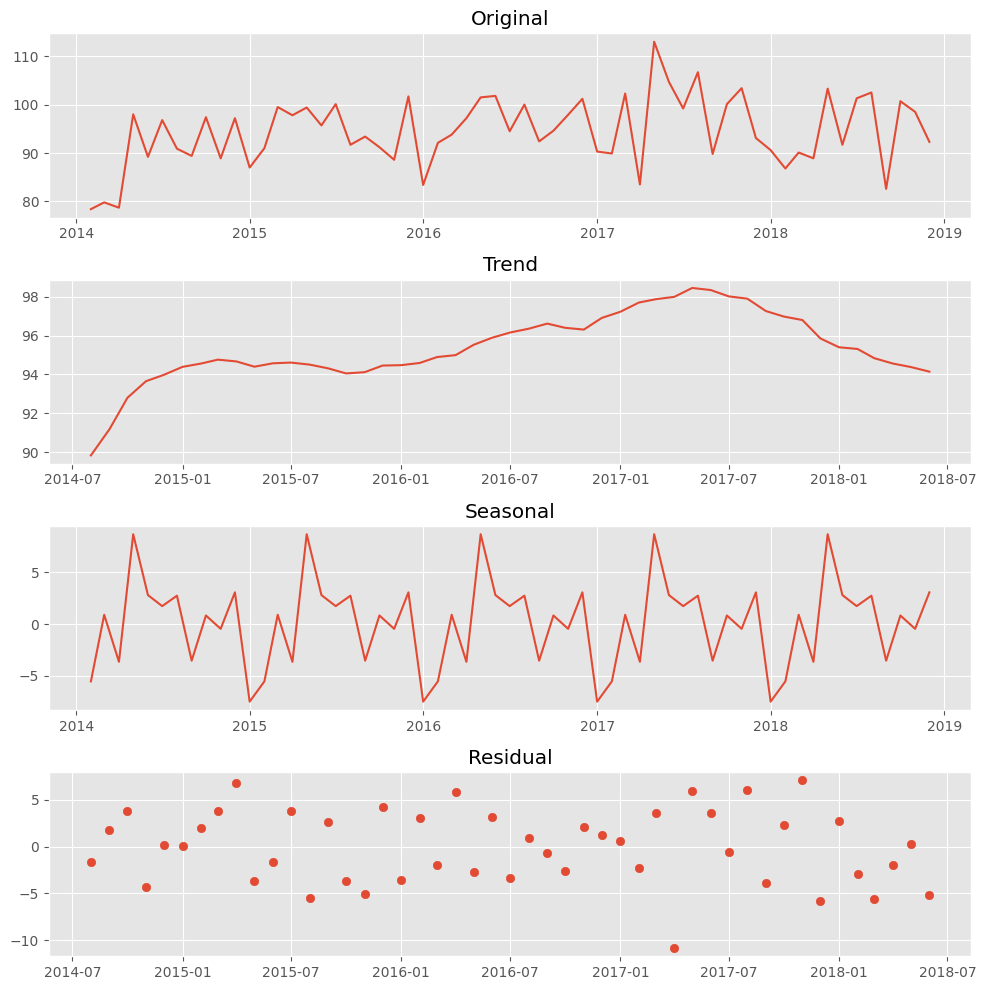

In [19]:
decomposition = seasonal_decompose(df_filtered['Count'], model='additive', period=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

fig, axes = plt.subplots(4, 1, figsize=(10, 10))

axes[0].plot(df_filtered['Count'])
axes[0].set_title('Original')

axes[1].plot(trend)
axes[1].set_title('Trend')

axes[2].plot(seasonal)
axes[2].set_title('Seasonal')

axes[3].scatter(df_filtered.index , residual)
axes[3].set_title('Residual')

fig.tight_layout()

**Primera Gr√°fica (Serie de Tiempo Completa)**
1. **Tendencia**: A simple vista, hay fluctuaciones considerables, con picos en varios momentos. No parece haber tendencia alguna.
2. **Estacionalidad**: Aparentemente, hay ciertos patrones repetitivos, aunque no es completamente claro en esta inspecci√≥n visual.
3. **Ruido**: Existen variaciones que no parecen seguir un patr√≥n claro, lo que puede ser interpretado como ruido.

**Segunda Gr√°fica (Descomposici√≥n)**

1. **Tendencia**: La segunda gr√°fica del descomposici√≥n muestra una tendencia creciente hasta aproximadamente 2016-2017, seguida de una ca√≠da suave.
2. **Estacionalidad**: El gr√°fico de estacionalidad muestra un patr√≥n repetitivo regular con una amplitud peque√±a (de alrededor de ¬±5 unidades). Esto indica que, aunque existe estacionalidad, su magnitud es menor comparada con la tendencia general.
3. **Residuos**: El gr√°fico de los residuos muestra valores alrededor de cero sin un patr√≥n claro, lo que sugiere que el modelo capta bien la tendencia y estacionalidad, y el ruido es aleatorio.

---

**Diferencia en las Escalas:**

1. **Gr√°fica Original**: Los valores en la gr√°fica de la serie completa oscilan entre 80 y 110. Esta gr√°fica incluye todas las fluctuaciones sin separar componentes, por lo que muestra tanto la tendencia como la estacionalidad y el ruido en una escala m√°s amplia.

2. **Descomposici√≥n**:
   - **Tendencia**: La tendencia es el componente de largo plazo que capta el comportamiento general de la serie a trav√©s del tiempo. Este componente suele tener la mayor magnitud de variaci√≥n, ya que refleja el cambio general en los niveles de los datos. Por lo tanto, su escala es similar a la escala completa de la serie original.

   - **Estacionalidad**: La estacionalidad tiene una amplitud m√°s peque√±a, oscilando entre -5 y +5. La estacionalidad representa fluctuaciones repetitivas que ocurren en intervalos regulares de tiempo (por ejemplo, ciclos anuales). Estas variaciones son mucho menores en magnitud que la tendencia. La estacionalidad muestra cu√°n desviados est√°n los valores de la serie de la tendencia en momentos espec√≠ficos, pero no afecta el nivel general de la serie, por lo que la escala es mucho m√°s peque√±a.

   - **Residuos**: Los residuos son lo que queda despu√©s de eliminar tanto la tendencia como la estacionalidad de los datos originales. Los residuos reflejan variaciones aleatorias que no siguen un patr√≥n espec√≠fico. Al ser estas variaciones m√°s peque√±as e impredecibles, los residuos tienen una escala mucho menor. Ya que el modelo de descomposici√≥n ajusta bien la serie, los residuos estan centrados en cero con poca variaci√≥n.

